# Cluster and Waveform Quality Metrics Analysis for the DataJoint Workflow: Exploration of Results


This notebook aims to explore the results obtained for the quality metrics through the array electrophysiology pipeline. New cells can be added to explore each table's dependencies and attributes.

**_Note:_**

- The examples in this notebook use a sample dataset. Replace these entries with your actual database entries to access and analyze your data.



### **Key Steps**

- **Setup**

- **Step 1: Select Session of Interest**

- **Step 2: Cluster Quality Metrics Exploration**

  - **2.1. Plot Cluster QM Histograms**

  - **2.2. Filtering Cluster QMs**

- **Step 3: Waveform Quality Metrics Exploration**

  - **3.1. Plot Waveform QM Histograms**

  - **3.2. Filtering Waveform QMs**


#### **Setup**


First, import the necessary packages for the data pipeline and essential schemas.


In [2]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [5]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
from workflow.pipeline import culture, ephys

[2024-07-25 18:37:23,196][INFO]: Connecting milagros@db.datajoint.com:3306
[2024-07-25 18:37:24,780][INFO]: Connected milagros@db.datajoint.com:3306


#### **Step 1: Select Session of Interest**


Let's select all the spike sorting sessions of 15min duration and for each batch 1, 2, and 3. 

In [12]:
# Fetch unique organoid IDs
organoid_ids = np.unique(culture.Experiment.fetch("organoid_id"))

# Create a string of organoid IDs for SQL query
organoid_ids_str = ", ".join(f"'{organoid_id}'" for organoid_id in organoid_ids)

# Build a query for sessions with a 15-minute duration
sessions_query = (
    (culture.Experiment * ephys.EphysSession)
    & f"session_type='spike_sorting'"
    & f"TIMESTAMPDIFF(MINUTE, start_time, end_time) = 15"
    & f"organoid_id IN ({organoid_ids_str})"
).proj(
    experiment_end_time="experiment_end_time",
    drug_name="drug_name",
    duration="TIMESTAMPDIFF(MINUTE, start_time, end_time)",
    organoid_id="organoid_id",
    start_time="start_time",
)

batch1 = "'O09', 'O10', 'O11', 'O12'"
batch2 = "'O13', 'O14', 'O15', 'O16'"
batch3 = "'O17', 'O18', 'O19', 'O20'"

batch1_query = sessions_query & f"organoid_id IN ({batch1})"
batch2_query = sessions_query & f"organoid_id IN ({batch2})"
batch3_query = sessions_query & f"organoid_id IN ({batch3})"

In [11]:
batch1_query

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,experiment_end_time,drug_name,duration calculated attribute
O09,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,2023-05-18 12:15:00,Control,15
O09,2023-05-03 17:33:00,0,2023-05-18 11:55:00,2023-05-18 12:10:00,2023-05-18 12:15:00,Control,15
O09,2023-05-18 12:25:00,0,2023-05-18 12:30:00,2023-05-18 12:45:00,2023-05-18 18:15:00,4-AP,15
O09,2023-05-18 12:25:00,0,2023-05-18 17:55:00,2023-05-18 18:10:00,2023-05-18 18:15:00,4-AP,15
O09,2023-05-18 18:15:00,0,2023-05-19 09:10:00,2023-05-19 09:25:00,2023-05-19 09:30:00,No Drug,15
O09,2023-05-19 09:30:00,0,2023-05-19 09:35:00,2023-05-19 09:50:00,2023-05-19 15:35:00,Bicuculline,15
O09,2023-05-19 09:30:00,0,2023-05-19 15:15:00,2023-05-19 15:30:00,2023-05-19 15:35:00,Bicuculline,15
O09,2023-05-19 15:45:00,0,2023-05-19 15:50:00,2023-05-19 16:05:00,2023-05-20 15:40:00,Tetrodotoxin,15
O09,2023-05-19 15:45:00,0,2023-05-20 15:20:00,2023-05-20 15:35:00,2023-05-20 15:40:00,Tetrodotoxin,15
O10,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,2023-05-18 12:15:00,Control,15


In [135]:
batch1_keys = batch1_query.fetch("KEY")
batch2_keys = batch2_query.fetch("KEY")
batch3_keys = batch3_query.fetch("KEY")

In [136]:
ephys.EphysSession * ephys.EphysSessionInfo & batch1_keys

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,session_type,session_info Session header info from intan .rhd file. Get this from the first session file.
O09,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,spike_sorting,=BLOB=
O09,2023-05-03 17:33:00,0,2023-05-18 11:55:00,2023-05-18 12:10:00,spike_sorting,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:30:00,2023-05-18 12:45:00,spike_sorting,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 17:55:00,2023-05-18 18:10:00,spike_sorting,=BLOB=
O09,2023-05-18 18:15:00,0,2023-05-19 09:10:00,2023-05-19 09:25:00,spike_sorting,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 09:35:00,2023-05-19 09:50:00,spike_sorting,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 15:15:00,2023-05-19 15:30:00,spike_sorting,=BLOB=
O09,2023-05-19 15:45:00,0,2023-05-19 15:50:00,2023-05-19 16:05:00,spike_sorting,=BLOB=
O09,2023-05-19 15:45:00,0,2023-05-20 15:20:00,2023-05-20 15:35:00,spike_sorting,=BLOB=
O10,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,spike_sorting,=BLOB=


#### **Step 2: Cluster Quality Metrics Exploration**

In [137]:
ephys.QualityMetrics & batch1_keys

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O10,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,1
O10,2023-05-03 17:33:00,0,2023-05-18 11:55:00,2023-05-18 12:10:00,1
O10,2023-05-18 12:25:00,0,2023-05-18 12:30:00,2023-05-18 12:45:00,1
O10,2023-05-18 12:25:00,0,2023-05-18 17:55:00,2023-05-18 18:10:00,1
O10,2023-05-18 18:15:00,0,2023-05-19 09:10:00,2023-05-19 09:25:00,1
O10,2023-05-19 09:30:00,0,2023-05-19 09:35:00,2023-05-19 09:50:00,1
O10,2023-05-19 09:30:00,0,2023-05-19 15:15:00,2023-05-19 15:30:00,1
O10,2023-05-19 15:45:00,0,2023-05-19 15:50:00,2023-05-19 16:05:00,1
O10,2023-05-19 15:45:00,0,2023-05-20 15:20:00,2023-05-20 15:35:00,1
O12,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,1


In [15]:
ephys.QualityMetrics & batch1_query

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O10,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,1
O10,2023-05-03 17:33:00,0,2023-05-18 11:55:00,2023-05-18 12:10:00,1
O10,2023-05-18 12:25:00,0,2023-05-18 12:30:00,2023-05-18 12:45:00,1
O10,2023-05-18 12:25:00,0,2023-05-18 17:55:00,2023-05-18 18:10:00,1
O10,2023-05-18 18:15:00,0,2023-05-19 09:10:00,2023-05-19 09:25:00,1
O10,2023-05-19 09:30:00,0,2023-05-19 09:35:00,2023-05-19 09:50:00,1
O10,2023-05-19 09:30:00,0,2023-05-19 15:15:00,2023-05-19 15:30:00,1
O10,2023-05-19 15:45:00,0,2023-05-19 15:50:00,2023-05-19 16:05:00,1
O10,2023-05-19 15:45:00,0,2023-05-20 15:20:00,2023-05-20 15:35:00,1
O12,2023-05-03 17:33:00,0,2023-05-03 17:38:00,2023-05-03 17:53:00,1


##### **2.1. Plot Cluster QM Histograms**


In [138]:
cluster_qm_query1 = ephys.QualityMetrics.Cluster & batch1_keys
cluster_qm_query2 = ephys.QualityMetrics.Cluster & batch2_keys
cluster_qm_query3 = ephys.QualityMetrics.Cluster & batch3_keys

In [156]:
from scipy.ndimage import gaussian_filter1d


def plot_metric(
    ax,
    datasets,
    bins,
    x_axis_label=None,
    title=None,
    colors=None,
    labels=None,
    units=None,  # Make sure units parameter is included
    smoothing=False,
    density=False,
):
    """A function to plot histograms with multiple datasets overlaid, with optional units."""
    from scipy.ndimage import gaussian_filter1d

    if colors is None:
        colors = ["k"] * len(datasets)  # Default to black if no colors are provided
    if labels is None:
        labels = [f"Dataset {i}" for i in range(len(datasets))]
    if units is None:
        units = [""] * len(datasets)  # Default to empty if no units are provided

    for data, color, label, unit in zip(datasets, colors, labels, units):
        if any(data) and np.nansum(data):
            h, b = np.histogram(data, bins=bins, density=density)
            x = b[:-1]
            y = gaussian_filter1d(h, 1) if smoothing else h
            width = np.diff(b)
            ax.bar(
                x,
                y,
                width=width,
                color=color,
                edgecolor="black",
                align="edge",
                alpha=0.7,
                label=f"{label} ({unit})",
            )

    ax.set_xlabel(x_axis_label)
    ax.set_ylim([0, None])
    ax.set_title(title)
    ax.spines[["right", "top"]].set_visible(False)
    ax.legend()

In [157]:
def plot_cluster_metrics(queries, metrics, metric_bins, batch_labels, metric_units):
    num_metrics = len(metrics)
    num_batches = len(queries)
    total_plots = num_metrics
    num_cols = 4  # Number of columns for subplots
    num_rows = -(
        -total_plots // num_cols
    )  # Calculate rows needed to accommodate all plots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

    plt.suptitle("Cluster Quality Metrics Comparison", y=0.99, fontsize=16)

    for j, (metric, unit) in enumerate(zip(metrics, metric_units)):
        bins = np.linspace(*metric_bins[metric], num=100)
        data_list = [query.fetch(metric) for query in queries]
        colors = [f"C{i}" for i in range(num_batches)]  # Assign a color for each batch
        plot_metric(
            axes[j],
            data_list,
            bins,
            x_axis_label=f"{metric} ({unit})",
            title=f"{metric}",
            colors=colors,
            labels=batch_labels,
        )

    # Remove any unused axes
    for ax in axes[total_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

In [158]:
ephys.QualityMetrics.Cluster.heading

# Cluster metrics for a particular unit
organoid_id          : varchar(4)                   # e.g. O17
experiment_start_time : datetime                     # 
insertion_number     : tinyint unsigned             # 
start_time           : datetime                     # 
end_time             : datetime                     # 
paramset_idx         : smallint                     # 
unit                 : int                          # 
---
firing_rate=null     : float                        # (Hz) firing rate for a unit
snr=null             : float                        # signal-to-noise ratio for a unit
presence_ratio=null  : float                        # fraction of time in which spikes are present
isi_violation=null   : float                        # rate of ISI violation as a fraction of overall rate
number_violation=null : int                          # total number of ISI violations
amplitude_cutoff=null : float                        # estimate of miss rate based on amplitude histog

In [159]:
metrics = ephys.QualityMetrics.Cluster.heading.secondary_attributes
metrics

['firing_rate',
 'snr',
 'presence_ratio',
 'isi_violation',
 'number_violation',
 'amplitude_cutoff',
 'isolation_distance',
 'l_ratio',
 'd_prime',
 'nn_hit_rate',
 'nn_miss_rate',
 'silhouette_score',
 'max_drift',
 'cumulative_drift',
 'contamination_rate']

In [160]:
# Define bin ranges for each metric - Notes added for context
metric_bins = {
    "firing_rate": (0, 100),  # Example: from 0 Hz to 100 Hz ,
    "snr": (
        0,
        10,
    ),  # Signal-to-Noise Ratio: signal quality, i.e. the better the higher
    "presence_ratio": (
        0,
        1,
    ),  # a high presence (1) may indicate strong and consistent signal, neuron active
    "isi_violation": (
        0,
        1,
    ),  # proportion of spikes that occur within a certain short interval (violating the refractory period of a neuron). High value may suggest presence of noise. For neural recordings, a lower ISI Violation ratio is usually preferred because it indicates higher quality data where detected spikes are less likely to be false positives.
    "number_violation": (
        0,
        10000,
    ),  # Close to 1000 poor spike sorting or high noise levels
    "amplitude_cutoff": (
        0,
        0.5,
    ),  # higher value suggests potential issues with spike detection, such as noise or missed spikes.
    "isolation_distance": (
        0,
        170,
    ),  # higher value suggests detected spikes are well-separated from noise and other neurons, implying high-quality spike sorting.
    "l_ratio": (
        0,
        1,
    ),  # lower value indicates better separation between clusters of spikes.
    "d_prime": (
        0,
        15,
    ),  # measure used in signal detection theory to quantify the ability of an observer to distinguish between signal and noise. Higher values indicate better separation between clusters of spikes.
    "nn_hit_rate": (
        0,
        1,
    ),  # A higher Nearest-Neighbors Hit Rate indicates better clustering or classification performance
    "nn_miss_rate": (
        0,
        1,
    ),  # a lower Nearest-Neighbors Miss Rate indicates better clustering or classification performance, as it suggests that the nearest neighbors tend to belong to the same class or cluster.
    "silhouette_score": (
        -1,
        1,
    ),  # It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
    "max_drift": (
        0,
        100,
    ),  # It measures the amount of movement or displacement of the recording electrode during the experiment. A high value may indicate that the electrode was not stable during the recording session.
    "cumulative_drift": (
        0,
        100,
    ),  # total movement or displacement of the recording electrode throughout the experiment duration
    "contamination_rate": (
        0,
        1,
    ),  # percentage of data points in a cluster that are not members of that cluster. A high contamination rate may indicate that the cluster contains a significant number of spikes from other neurons.
}

In [161]:
metrics_units = [
    "Hz",  # firing_rate
    "ratio",  # snr
    "ratio",  # presence_ratio
    "ratio",  # isi_violation
    "#",  # number_violation
    "ratio",  # amplitude_cutoff
    "",  # isolation_distance (dimensionless)
    "",  # l_ratio (dimensionless)
    "",  # d_prime (dimensionless)
    "",  # nn_hit_rate (dimensionless)
    "",  # nn_miss_rate (dimensionless)
    "",  # silhouette_score (dimensionless)
    "",  # max_drift (dimensionless, may need specific unit if available)
    "",  # cumulative_drift (dimensionless, may need specific unit if available)
    "ratio",  # contamination_rate
]

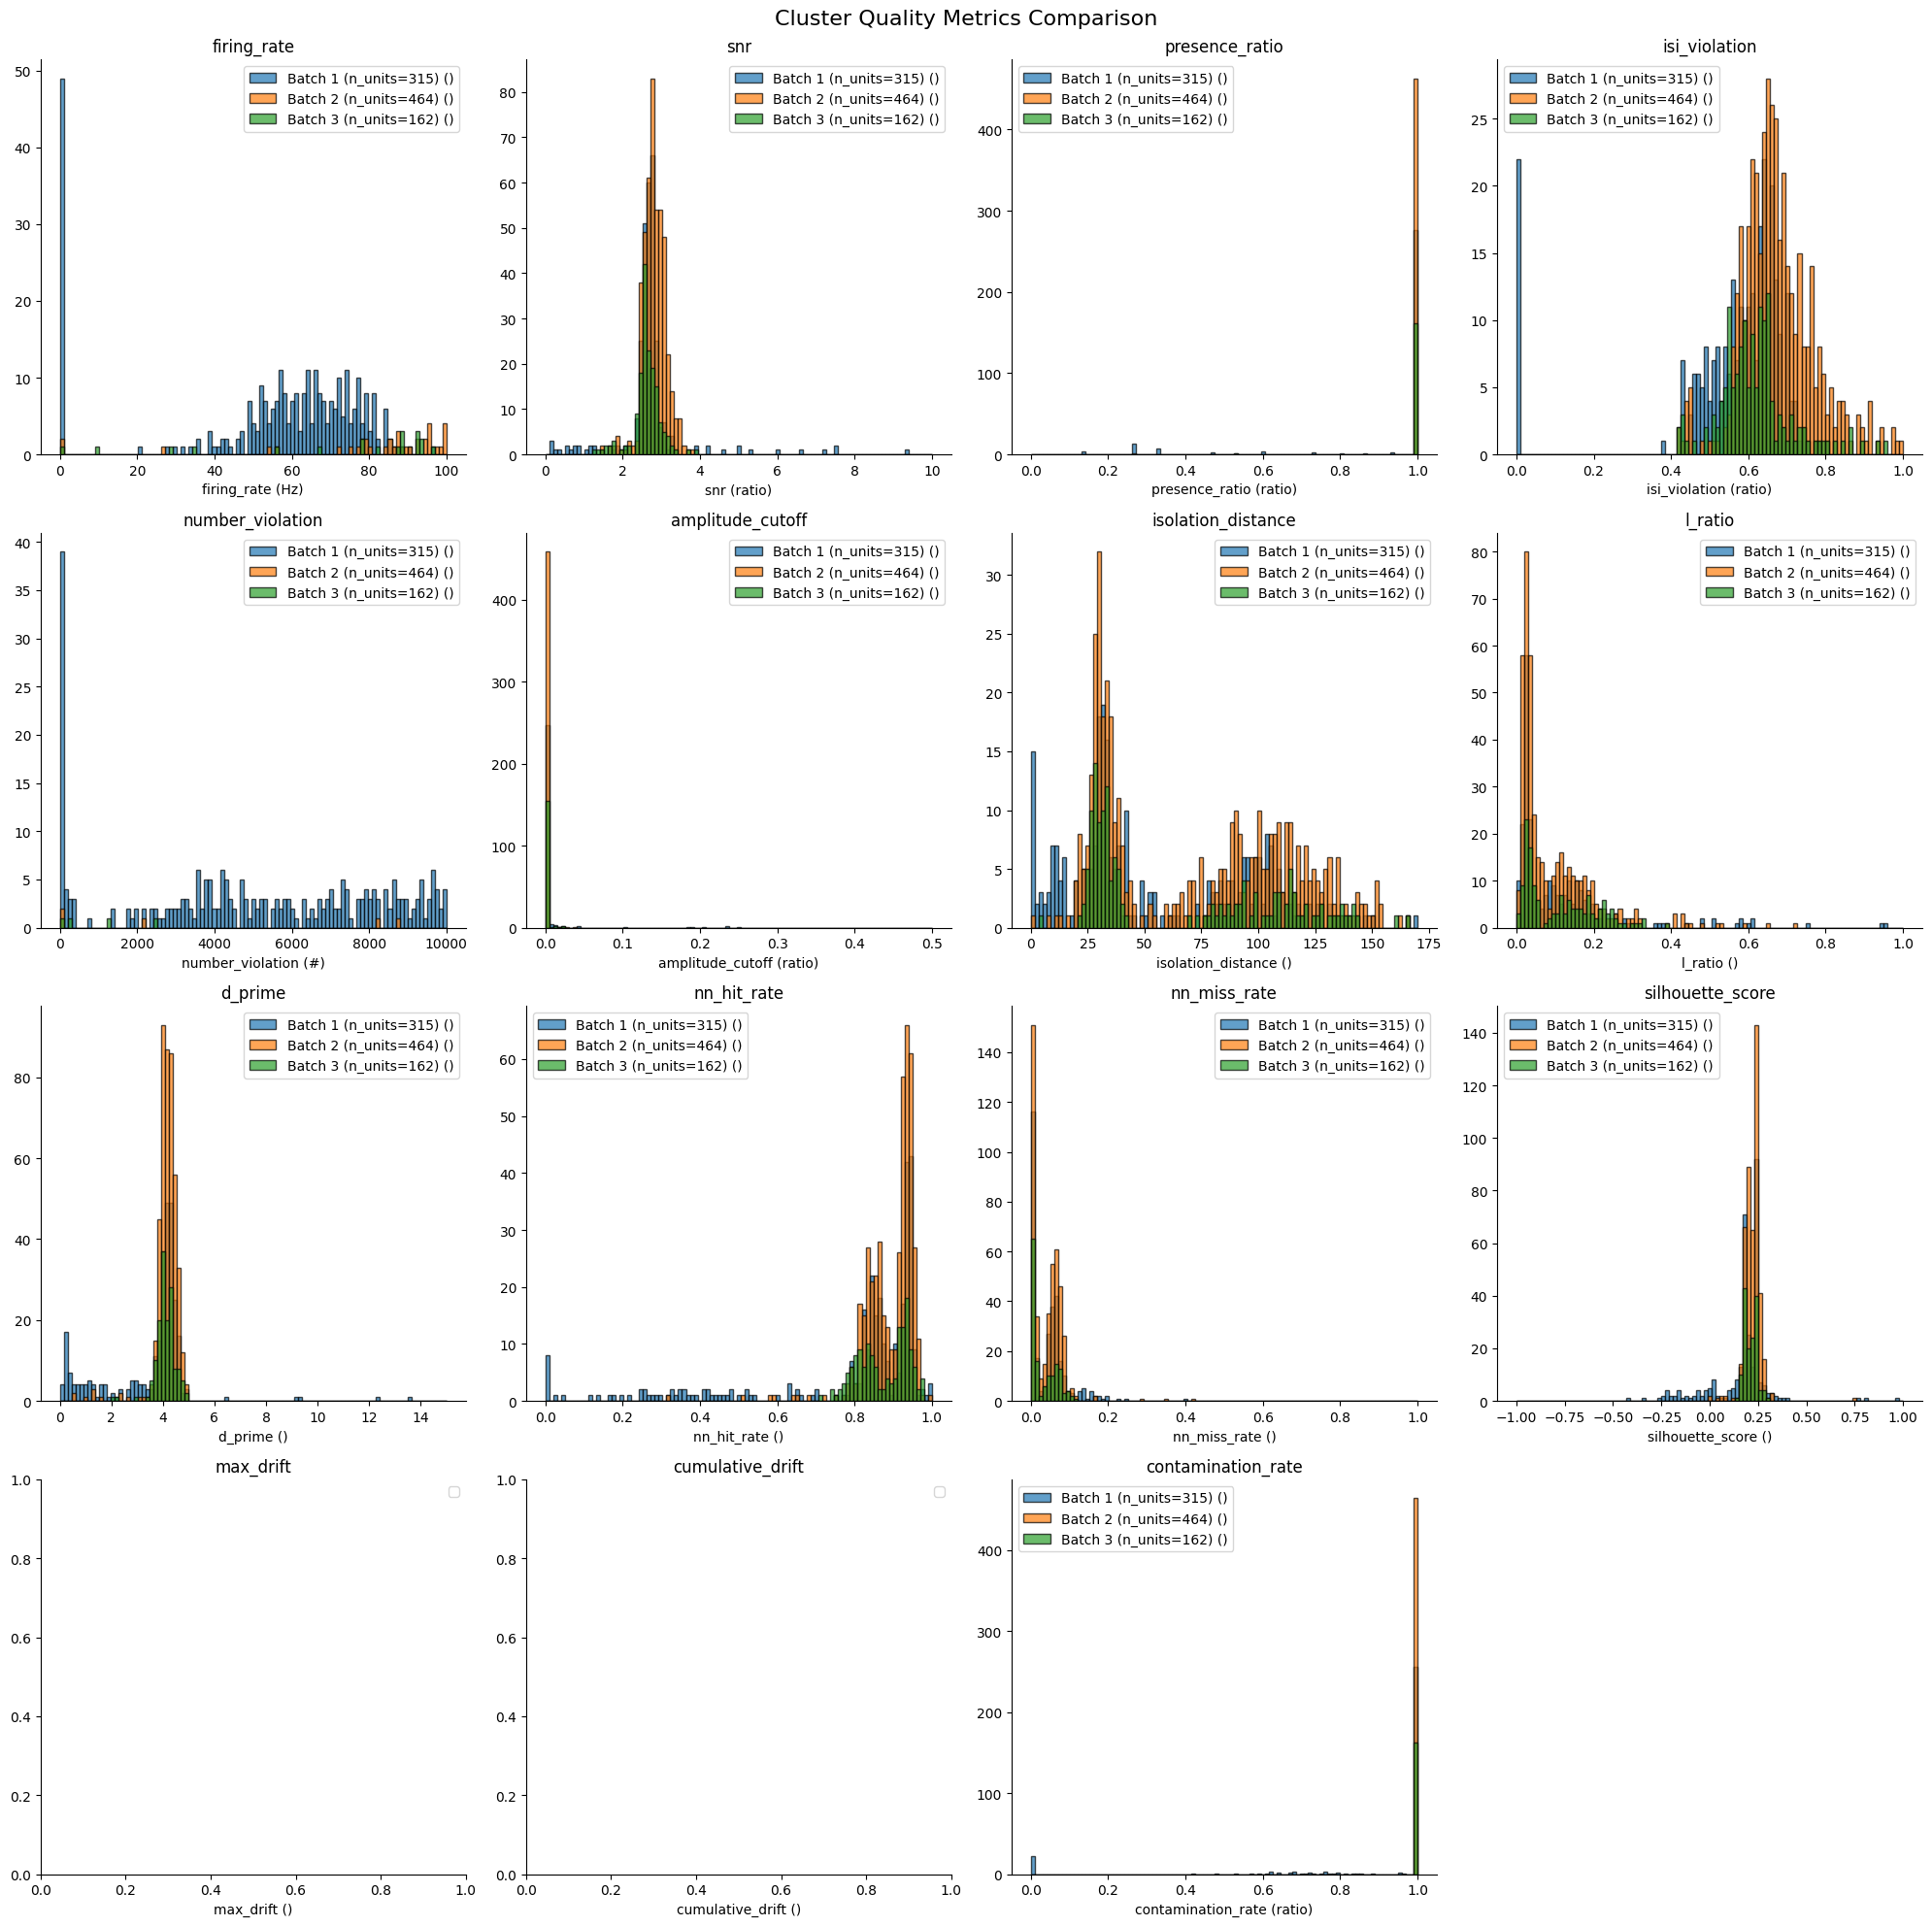

In [162]:
plot_cluster_metrics(
    queries=[cluster_qm_query1, cluster_qm_query2, cluster_qm_query3],
    metrics=metrics,
    metric_bins=metric_bins,
    metric_units=metrics_units,
    batch_labels=[
        f"Batch 1 (n_units={len(cluster_qm_query1)})",
        f"Batch 2 (n_units={len(cluster_qm_query2)})",
        f"Batch 3 (n_units={len(cluster_qm_query3)})",
    ],
)

##### **2.2. Filtering Cluster QMs**


##### Batch 1

In [163]:
filtered_key = (cluster_qm_query1 & "contamination_rate < 0.8").fetch("KEY")
len(filtered_key)

51

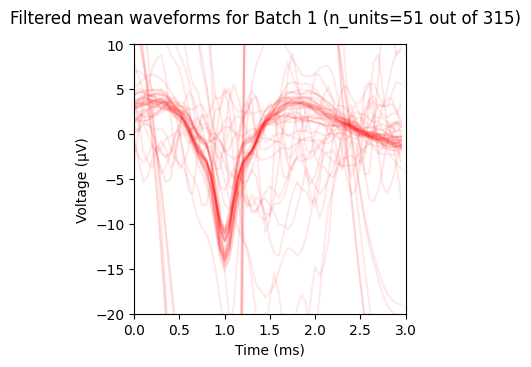

In [164]:
# Plotting the mean waveforms
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & filtered_key).fetch("session_info")[0][
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for Batch 1 (n_units={len(filtered_key)} out of {len(cluster_qm_query1)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

##### Batch 2

In [165]:
filtered_key = (cluster_qm_query2 & "contamination_rate < 0.9").fetch("KEY")
len(filtered_key)

0

In [166]:
cluster_qm_query2.fetch("contamination_rate")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

The contamination rate in Batch 2 may indicate that the cluster contains a significant number of spikes from other neurons.

In [167]:
filtered_key = (cluster_qm_query2 & "isi_violation < 0.5").fetch("KEY")
len(filtered_key)

14

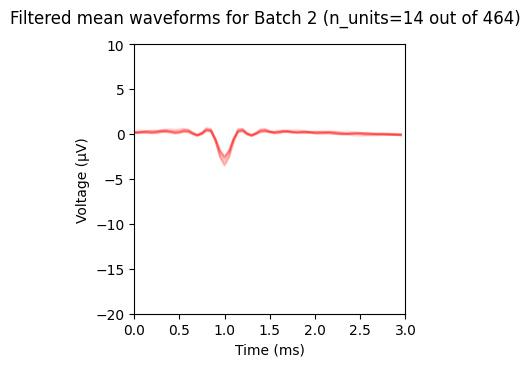

In [168]:
# Plotting
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & filtered_key).fetch("session_info")[0][
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for Batch 2 (n_units={len(filtered_key)} out of {len(cluster_qm_query2)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

##### Batch 3

In [169]:
filtered_key = (cluster_qm_query2 & "contamination_rate < 0.9").fetch("KEY")
len(filtered_key)

0

In [170]:
cluster_qm_query3.fetch("contamination_rate")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

The contamination rate in Batch 2 may indicate that the cluster contains a significant number of spikes from other neurons.

In [171]:
filtered_key = (cluster_qm_query3 & "isi_violation < 0.5").fetch("KEY")
len(filtered_key)

9

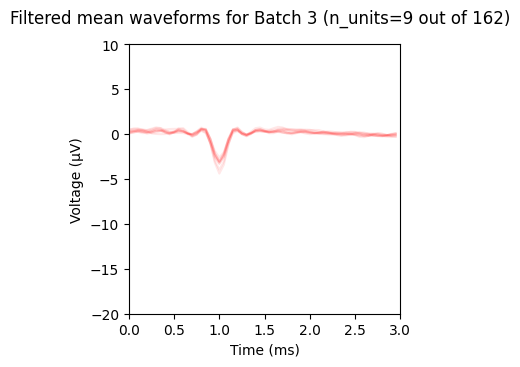

In [172]:
# Plotting
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & filtered_key).fetch("session_info")[0][
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for Batch 3 (n_units={len(filtered_key)} out of {len(cluster_qm_query3)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

#### **Step 3: Waveform Quality Metrics Exploration**


##### **3.1. Plot Waveform QM Histograms**


In [173]:
wf_qm_query1 = ephys.QualityMetrics.Waveform & batch1_keys
wf_qm_query2 = ephys.QualityMetrics.Waveform & batch2_keys
wf_qm_query3 = ephys.QualityMetrics.Waveform & batch3_keys

In [174]:
wf_qm_query1.heading

# Waveform metrics for a particular unit
organoid_id          : varchar(4)                   # e.g. O17
experiment_start_time : datetime                     # 
insertion_number     : tinyint unsigned             # 
start_time           : datetime                     # 
end_time             : datetime                     # 
paramset_idx         : smallint                     # 
unit                 : int                          # 
---
amplitude=null       : float                        # (uV) absolute difference between waveform peak and trough
duration=null        : float                        # (ms) time between waveform peak and trough
halfwidth=null       : float                        # (ms) spike width at half max amplitude
pt_ratio=null        : float                        # absolute amplitude of peak divided by absolute amplitude of trough relative to 0
repolarization_slope=null : float                        # the repolarization slope was defined by fitting a regression line

In [175]:
waveform_metrics = ephys.QualityMetrics.Waveform.heading.secondary_attributes
waveform_metrics

['amplitude',
 'duration',
 'halfwidth',
 'pt_ratio',
 'repolarization_slope',
 'recovery_slope',
 'spread',
 'velocity_above',
 'velocity_below']

In [176]:
waveform_metric_bins = {
    "amplitude": (0, 300),
    "duration": (0, 3),
    "halfwidth": (0, 2),
    "pt_ratio": (
        0,
        2,
    ),  # A PT Ratio closer to 1 indicates that the peak and trough have similar amplitudes, suggesting a symmetric waveform. A PT Ratio significantly different from 1 indicates asymmetry in the waveform, with the peak or trough being more prominent.
    "repolarization_slope": (0, 10),
    "recovery_slope": (0, 10),
    "spread": (0, 1000),
    "velocity_above": (0, 0.1),
    "velocity_below": (0, 0.1),
}

In [177]:
waveform_metrics_units = {
    "amplitude": "μV",
    "duration": "ms",
    "halfwidth": "ms",
    "pt_ratio": "",
    "repolarization_slope": "",
    "recovery_slope": "",
    "spread": "μm",
    "velocity_above": "s/m",
    "velocity_below": "s/m",
}

In [178]:
def plot_waveform_metrics(
    queries, metrics, metric_bins, batch_labels, waveform_metrics_units
):
    num_metrics = len(metrics)
    num_batches = len(queries)
    total_plots = num_metrics
    num_cols = 4
    num_rows = -(
        -total_plots // num_cols
    )  # Calculate rows needed to accommodate all plots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

    plt.suptitle("Waveform Quality Metrics Comparison", y=0.99, fontsize=16)

    for j, metric in enumerate(metrics):
        bins = np.linspace(*metric_bins[metric], num=100)
        data_list = [query.fetch(metric) for query in queries]
        colors = [f"C{i}" for i in range(num_batches)]  # Assign a color for each batch
        plot_metric(
            axes[j],
            data_list,
            bins,
            title=f"{metric}",
            colors=colors,
            labels=batch_labels,
            units=[waveform_metrics_units[metric]]
            * num_batches,  # Ensure units are passed
        )

    # Remove any unused axes
    for ax in axes[total_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

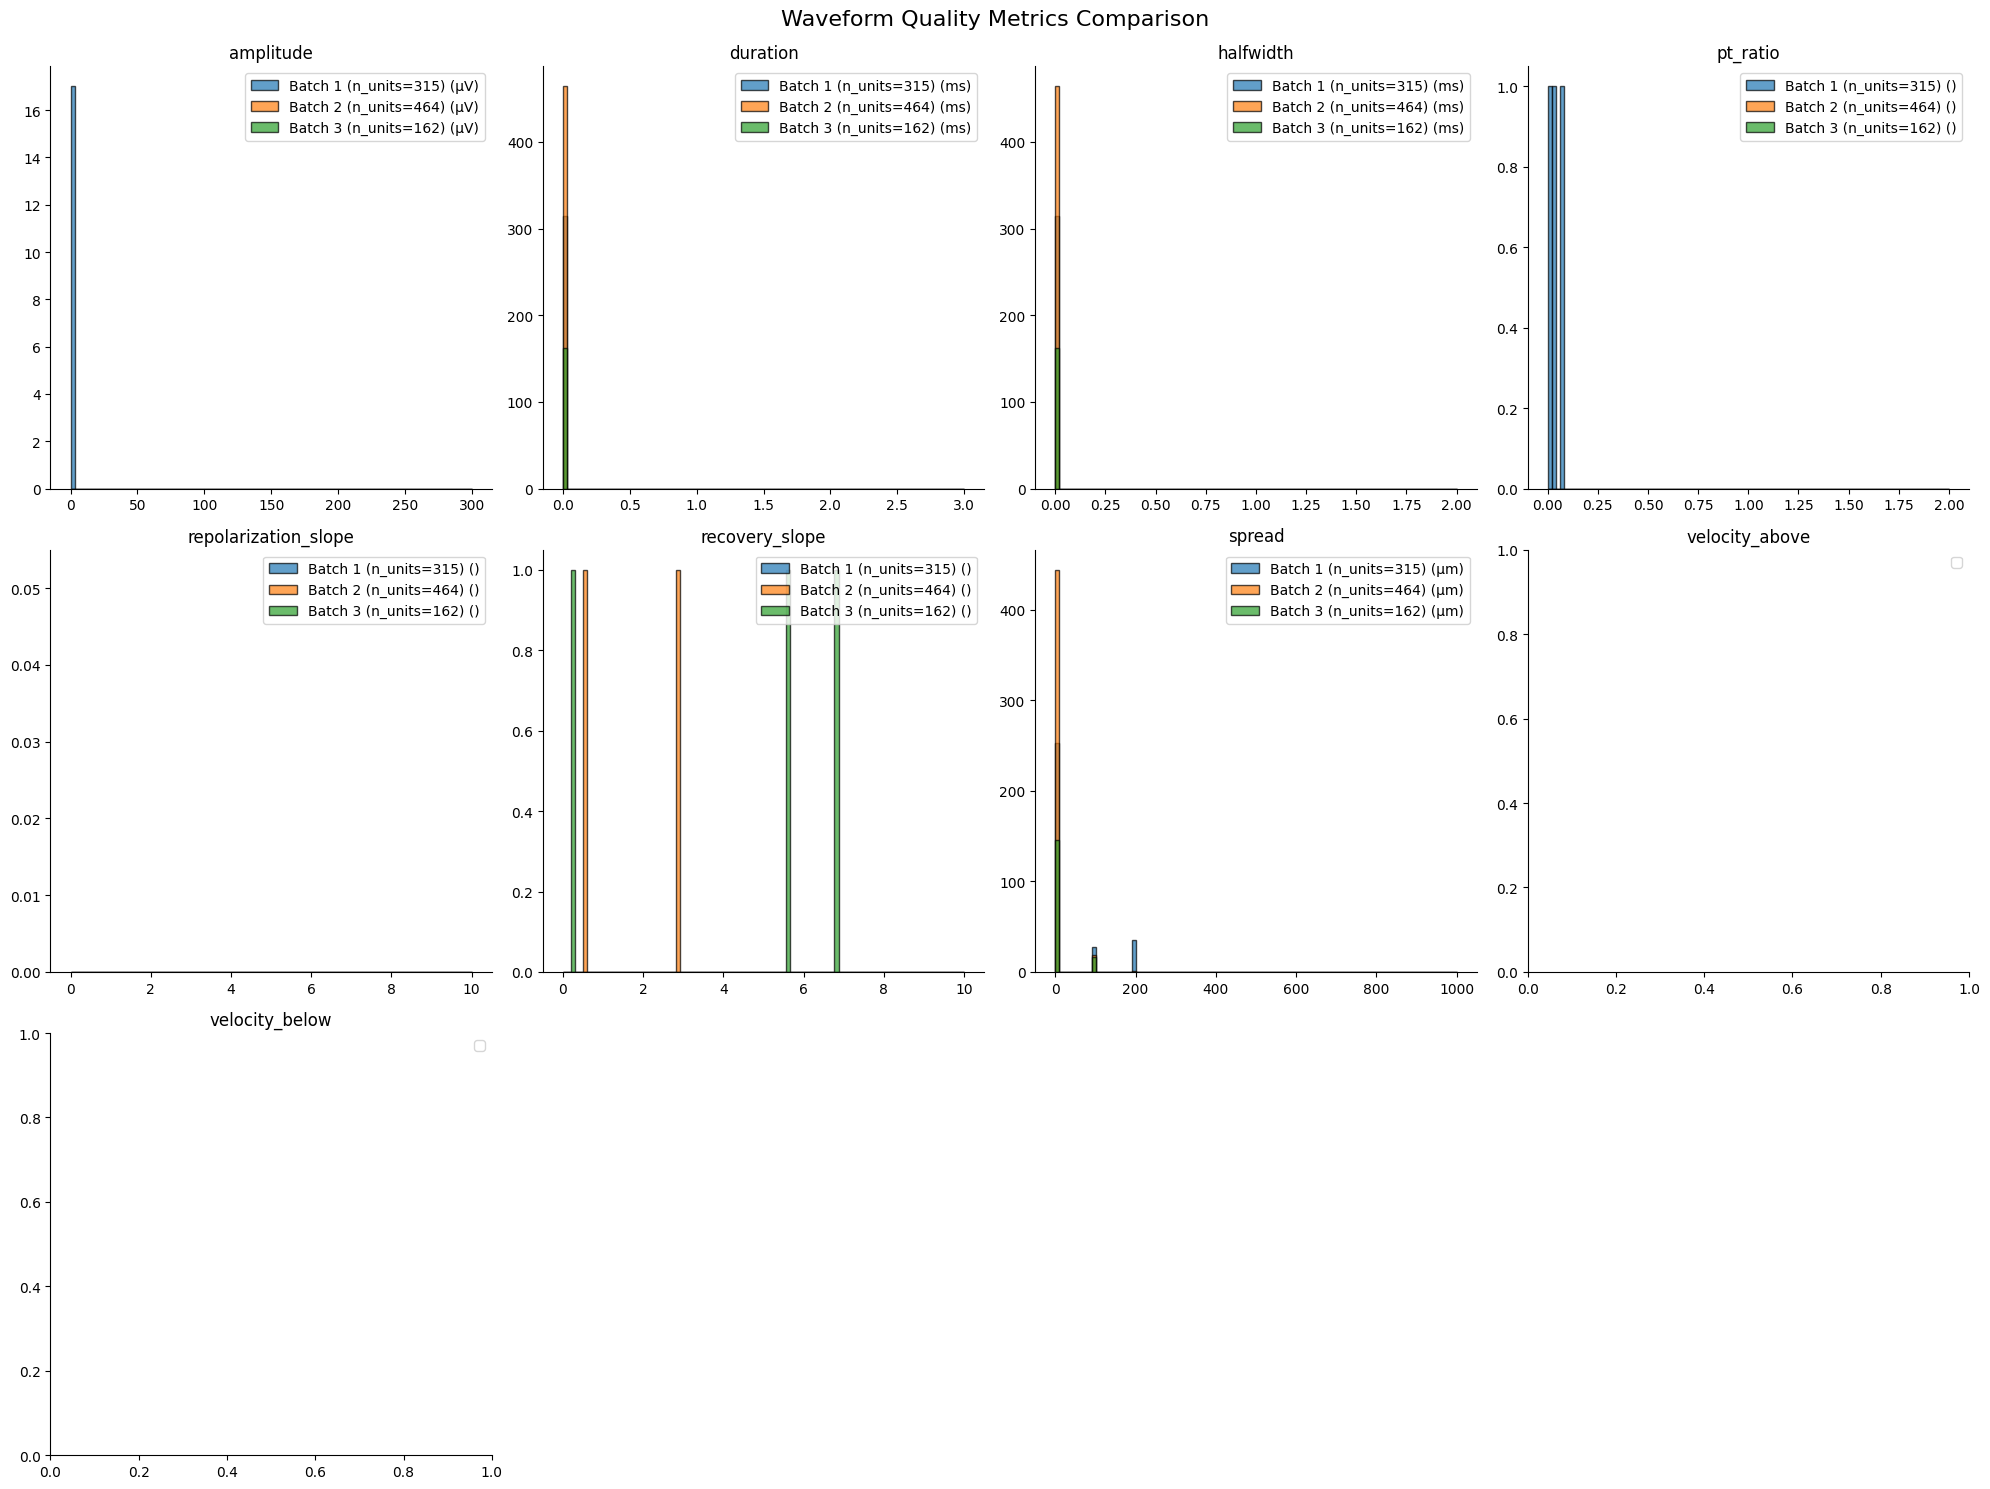

In [179]:
plot_waveform_metrics(
    queries=[
        wf_qm_query1,
        wf_qm_query2,
        wf_qm_query3,
    ],
    metrics=waveform_metrics,
    metric_bins=waveform_metric_bins,
    waveform_metrics_units=waveform_metrics_units,
    batch_labels=[
        f"Batch 1 (n_units={len(wf_qm_query1)})",
        f"Batch 2 (n_units={len(wf_qm_query2)})",
        f"Batch 3 (n_units={len(wf_qm_query3)})",
    ],
)

##### **2.2. Filtering Waveform QMs**


##### Batch 1

In [189]:
filtered_key = (wf_qm_query1 & "spread < 50").fetch("KEY")
len(filtered_key)

253

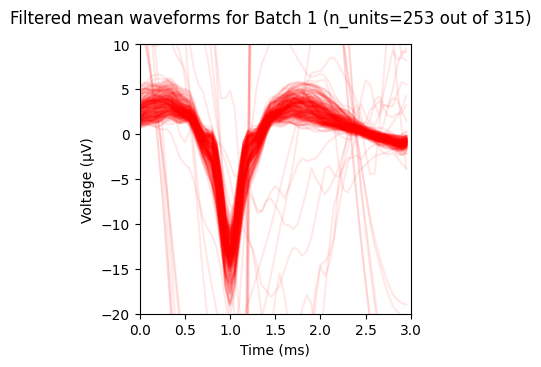

In [181]:
# Plotting the mean waveforms
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & filtered_key).fetch("session_info")[0][
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for Batch 1 (n_units={len(filtered_key)} out of {len(wf_qm_query1)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

##### Batch 2

In [184]:
filtered_key = (wf_qm_query2 & "spread < 50").fetch("KEY")
len(filtered_key)

444

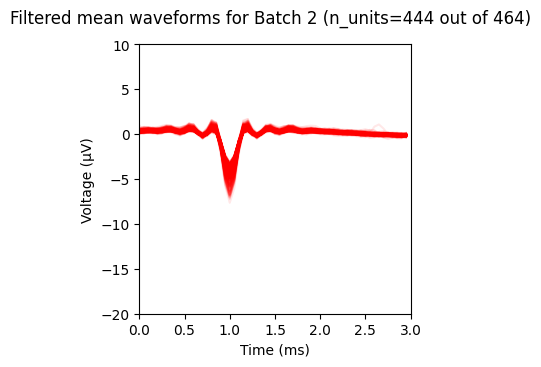

In [185]:
# Plotting the mean waveforms
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & filtered_key).fetch("session_info")[0][
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for Batch 2 (n_units={len(filtered_key)} out of {len(wf_qm_query2)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

##### Batch 3

In [186]:
filtered_key = (wf_qm_query3 & "spread < 50").fetch("KEY")
len(filtered_key)

146

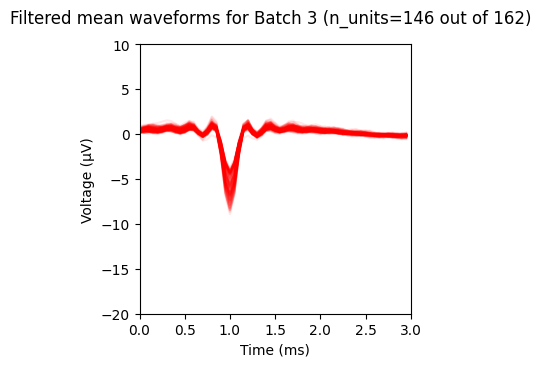

In [187]:
# Plotting the mean waveforms
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sample_rate = (ephys.EphysSessionInfo & filtered_key).fetch("session_info")[0][
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for Batch 3 (n_units={len(filtered_key)} out of {len(wf_qm_query3)})"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()